In [478]:
# pip install country-bounding-boxes

import numpy as np # linear algebra
from numpy import genfromtxt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
from shapely.geometry import shape
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import seaborn as sb
from sklearn import preprocessing
from geopy.distance import geodesic
from scipy.spatial import cKDTree

import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
from mpl_toolkits.basemap import Basemap
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
    
df = pd.read_csv('meteorite-landings.csv')
df.count()

name           45716
id             45716
nametype       45716
recclass       45716
mass           45585
fall           45716
year           45428
reclat         38401
reclong        38401
GeoLocation    38401
dtype: int64

In [479]:
df = df.dropna()

In [480]:
count_nan = df.isnull().sum()
print(count_nan[count_nan > 0])

Series([], dtype: int64)


In [481]:
# Primitive, Asteroidal, Lunar, Martain Achondrites Meteorites
df.recclass.replace(to_replace=['Acapulcoite', 'Acapulcoite/Lodranite', 'Acapulcoite/lodranite',
           'Lodranite','Lodranite-an','Winonaite','Achondrite-prim','Lunar','Lunar (anorth)', 'Lunar (bas. breccia)',
           'Lunar (bas/anor)', 'Lunar (bas/gab brec)', 'Lunar (basalt)',
           'Lunar (feldsp. breccia)', 'Lunar (gabbro)', 'Lunar (norite)','Martian', 'Martian (OPX)','Martian (chassignite)', 'Martian (nakhlite)',
           'Martian (shergottite)','Martian (basaltic breccia)','Angrite', 'Aubrite','Aubrite-an','Ureilite', 'Ureilite-an','Ureilite-pmict',
           'Brachinite','Diogenite', 'Diogenite-an', 'Diogenite-olivine', 'Diogenite-pm',
           'Eucrite', 'Eucrite-Mg rich', 'Eucrite-an', 'Eucrite-br','Eucrite-cm',
           'Eucrite-mmict', 'Eucrite-pmict', 'Eucrite-unbr','Howardite'],value='PA',inplace=True)

# Carbonaceous Chondrite
df.recclass.replace(to_replace=['C','C2','C4','C4/5','C6','C1-ung', 'C1/2-ung','C2-ung',
           'C3-ung', 'C3/4-ung','C4-ung','C5/6-ung',
           'CB', 'CBa', 'CBb', 'CH/CBb', 'CH3', 'CH3 ', 'CI1', 'CK', 'CK3',
           'CK3-an', 'CK3.8', 'CK3/4', 'CK4', 'CK4-an', 'CK4/5', 'CK5',
           'CK5/6', 'CK6', 'CM', 'CM-an', 'CM1', 'CM1/2', 'CM2', 'CM2-an',
           'CO3', 'CO3 ', 'CO3.0', 'CO3.1', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5',
           'CO3.6', 'CO3.7', 'CO3.8', 'CR', 'CR-an', 'CR1', 'CR2', 'CR2-an',
           'CV2', 'CV3', 'CV3-an','CR7'],value='CC',inplace=True)

# LL Ordinary Chondrite
df.recclass.replace(to_replace=['L(LL)3', 'L(LL)3.05', 'L(LL)3.5-3.7', 'L(LL)5', 'L(LL)6',
           'L(LL)~4', 'L/LL', 'L/LL(?)3', 'L/LL-melt rock', 'L/LL3', 'L/LL3-5', 'L/LL3-6',
           'L/LL3.10', 'L/LL3.2', 'L/LL3.4', 'L/LL3.5', 'L/LL3.6/3.7', 'L/LL4',
           'L/LL4-6', 'L/LL4/5', 'L/LL5', 'L/LL5-6', 'L/LL5/6', 'L/LL6',
           'L/LL6-an', 'L/LL~4', 'L/LL~5', 'L/LL~6', 'LL', 'LL(L)3', 'LL-melt rock', 'LL3',
           'LL3-4', 'LL3-5', 'LL3-6', 'LL3.0', 'LL3.00', 'LL3.1', 'LL3.1-3.5',
           'LL3.10', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.5', 'LL3.6',
           'LL3.7', 'LL3.7-6', 'LL3.8', 'LL3.8-6', 'LL3.9', 'LL3.9/4', 'LL3/4',
           'LL4', 'LL4-5', 'LL4-6', 'LL4/5', 'LL4/6', 'LL5', 'LL5-6', 'LL5-7',
           'LL5/6', 'LL6', 'LL6 ', 'LL6(?)', 'LL6/7', 'LL7', 'LL7(?)',
           'LL<3.5', 'LL~3', 'LL~4', 'LL~4/5', 'LL~5', 'LL~6','LL-melt breccia','LL-imp melt',
            'LL6-melt breccia','LL3.05','LL3.8-4','LL6-an','LL(L)3.1'],value='LLOC',inplace=True)

# L Ordinary Chondrite
df.recclass.replace(to_replace=['L', 'L(?)3',
           'L(H)3', 'L-imp melt', 'L-melt breccia', 'L-melt rock', 'L-metal',
           'L3', 'L3-4', 'L3-5','L3-6', 'L3-7', 'L3.0', 'L3.0-3.7', 'L3.0-3.9', 'L3.05', 'L3.1',
           'L3.10', 'L3.2', 'L3.2-3.5', 'L3.2-3.6', 'L3.3', 'L3.3-3.5',
           'L3.3-3.6', 'L3.3-3.7', 'L3.4', 'L3.4-3.7', 'L3.5', 'L3.5-3.7',
           'L3.5-3.8', 'L3.5-3.9', 'L3.5-5', 'L3.6', 'L3.6-4', 'L3.7',
           'L3.7-3.9', 'L3.7-4', 'L3.7-6', 'L3.7/3.8', 'L3.8', 'L3.8-5',
           'L3.8-6', 'L3.8-an', 'L3.9', 'L3.9-5', 'L3.9-6', 'L3.9/4', 'L3/4',
           'L4', 'L4 ', 'L4-5', 'L4-6', 'L4-an', 'L4-melt rock', 'L4/5', 'L5',
           'L5 ', 'L5-6', 'L5-7', 'L5/6', 'L6', 'L6 ', 'L6-melt breccia',
           'L6-melt rock', 'L6/7', 'L7', 'L~3', 'L~4', 'L5-melt breccia','L~5', 'L~6','H3.05','H4-melt breccia','L3.00','L~4-6',
           'L4-melt breccia','L3-melt breccia','H3.15'],value='LOC',inplace=True)

# H Ordinary Chondrite
df.recclass.replace(to_replace=['OC', 'OC3','H', 'H(5?)', 'H(?)4', 'H(L)3', 'H(L)3-an', 'H-an','H-imp melt',
           'H-melt rock', 'H-metal', 'H/L3', 'H/L3-4', 'H/L3.5',
           'H/L3.6', 'H/L3.7', 'H/L3.9', 'H/L4', 'H/L4-5', 'H/L4/5', 'H/L5',
           'H/L6', 'H/L6-melt rock', 'H/L~4', 'H3', 'H3 ', 'H3-4', 'H3-5',
           'H3-6', 'H3-an', 'H3.0', 'H3.0-3.4', 'H3.1', 'H3.10', 'H3.2',
           'H3.2-3.7', 'H3.2-6', 'H3.2-an', 'H3.3', 'H3.4', 'H3.4-5',
           'H3.4/3.5', 'H3.5', 'H3.5-4', 'H3.6', 'H3.6-6', 'H3.7', 'H3.7-5',
           'H3.7-6', 'H3.7/3.8', 'H3.8', 'H3.8-4', 'H3.8-5', 'H3.8-6',
           'H3.8-an', 'H3.8/3.9', 'H3.8/4', 'H3.9', 'H3.9-5', 'H3.9-6',
           'H3.9/4', 'H3/4', 'H4', 'H4 ', 'H4(?)', 'H4-5', 'H4-6', 'H4-an',
           'H4/5', 'H4/6', 'H5', 'H5 ', 'H5-6', 'H5-7', 'H5-an',
           'H5-melt breccia', 'H5/6', 'H6', 'H6 ', 'H6-melt breccia', 'H6/7',
           'H7', 'H?','H~4', 'H~4/5', 'H~5', 'H~6','Relict H','Relict OC','H-melt breccia',
           'H3.05','H4-melt breccia','H3.15'],value='HOC',inplace=True)

#Other Chondrite (including Enstatite)
df.recclass.replace(to_replace=['EH','EH-imp melt', 'EH3', 'EH3/4-an', 'EH4', 'EH4/5', 'EH5', 'EH6',
           'EH6-an', 'EH7', 'EH7-an', 'EL3', 'EL3/4', 'EL4', 'EL4/5', 'EL5',
           'EL6', 'EL6 ', 'EL6/7', 'EL7','E','E3','E4', 'E5','E6','EL-melt rock','K', 'K3','R', 'R3', 'R3-4', 'R3-5', 'R3-6', 'R3.4', 'R3.5-6',
           'R3.6', 'R3.7', 'R3.8', 'R3.8-5', 'R3.8-6', 'R3.9', 'R3/4', 'R4',
           'R4/5', 'R5', 'R6','R3.5-4'],value='OC',inplace=True)


# Stony-Iron Meteorites
df.recclass.replace(to_replace=['Pallasite', 'Pallasite, PES','Pallasite, PMG', 
           'Pallasite, PMG-an', 'Pallasite, ungrouped',
           'Pallasite?','Mesosiderite', 'Mesosiderite-A','Mesosiderite-A1',
           'Mesosiderite-A2', 'Mesosiderite-A3','Mesosiderite-A3/4',
           'Mesosiderite-A4', 'Mesosiderite-B','Mesosiderite-B1',
           'Mesosiderite-B2', 'Mesosiderite-B4','Mesosiderite-C',
           'Mesosiderite-C2', 'Mesosiderite-an','Mesosiderite?'],value='SIM',inplace=True) 

# Iron Meteorites
df.recclass.replace(to_replace=['Iron, IC', 'Iron, IC-an', 'Iron, IIAB', 'Iron, IIAB-an',
           'Iron, IIC', 'Iron, IID', 'Iron, IID-an','Iron, IIF', 'Iron, IIG',
           'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IIIAB?', 'Iron, IIIE',
           'Iron, IIIE-an', 'Iron, IIIF', 'Iron, IVA', 'Iron, IVA-an',
           'Iron, IVB','Iron, IAB complex', 'Iron, IAB-MG','Iron, IAB-an', 'Iron, IAB-sHH',
           'Iron, IAB-sHL', 'Iron, IAB-sLH','Iron, IAB-sLL', 'Iron, IAB-sLM',
           'Iron, IAB-ung', 'Iron, IAB?','Iron, IIE',
           'Iron, IIE-an', 'Iron, IIE?','Iron','Iron?','Relict iron','Chondrite-fusion crust',
           'Fusion crust','Impact melt breccia',
           'Enst achon-ung','Iron, ungrouped','Stone-uncl', 'Stone-ung',
           'Unknown','Achondrite-ung','Chondrite-ung',
           'Enst achon','E-an',  'E3-an',  'E5-an','Howardite-an','C3.0-ung','Iron, IAB-sHL-an'],value='IM',inplace=True)



print("CLASS\n")
print(df["recclass"].value_counts())
df.recclass.unique()

CLASS

HOC     15874
LOC     12896
LLOC     4821
PA       1477
CC       1266
IM       1074
OC        494
SIM       214
Name: recclass, dtype: int64


array(['LOC', 'HOC', 'OC', 'PA', 'LLOC', 'IM', 'CC', 'SIM'], dtype=object)

In [482]:
label_encoder = preprocessing.LabelEncoder()
df["num_class"] = label_encoder.fit_transform(df["recclass"])
df.rename({"reclong": "Long", "reclat": "Lat"}, axis=1, inplace=True)
df

,name,id,nametype,recclass,mass,fall,year,Lat,Long,GeoLocation,num_class
0,Aachen,1,Valid,LOC,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",4
1,Aarhus,2,Valid,HOC,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",1
2,Abee,6,Valid,OC,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)",5
3,Acapulco,10,Valid,PA,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)",6
4,Achiras,370,Valid,LOC,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)",4
...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,PA,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)",6
45712,Zinder,30409,Valid,SIM,46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)",7
45713,Zlin,30410,Valid,HOC,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)",1
45714,Zubkovsky,31357,Valid,LOC,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)",4


In [483]:
df = df.dropna(subset=["Long", "Lat","GeoLocation","mass","year"])
df = df[df["year"]>1000]
df = df[df["year"]<2015]

<Figure size 1584x864 with 0 Axes>

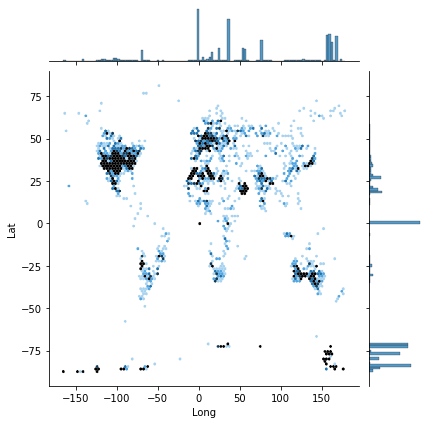

In [484]:
figure = plt.figure(figsize=(22,12))
sb.jointplot(data=df,x="Long", y="Lat", kind="hex",
             gridsize=100, vmax=5, linewidth=0, marginal_kws={"bins": 120});

Text(0.5, 1.0, 'Meteorite Landing')

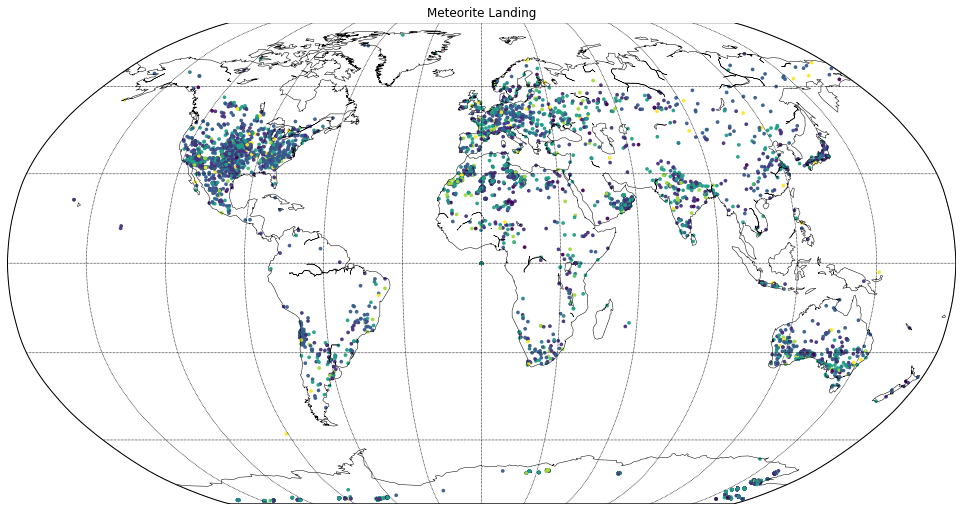

In [485]:
figure = plt.figure(figsize=(17,12))

Map_Plot = Basemap(projection='robin',lon_0=0,resolution='c')
Map_Plot.drawmapboundary(fill_color="w")
Map_Plot.drawcoastlines(linewidth=0.5)
Map_Plot.drawmeridians(range(0, 360, 30),linewidth=0.7)
Map_Plot.drawparallels([-60,-30,0.0,30,60],linewidth=0.7)
lon,lat = Map_Plot(df["Long"],df["Lat"])
Map_Plot.scatter(lon,lat,marker=".",s=55, c=df["num_class"], alpha=0.95,edgecolor="None")

plt.title("Meteorite Landing")

In [486]:
pop = pd.read_csv('worldcities.csv')
pop.rename({"lng": "Long", "lat": "Lat"}, axis=1, inplace=True)
pop

,city,city_ascii,Lat,Long,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [487]:
count_nan = pop.isnull().sum()
print(count_nan[count_nan > 0])

iso2             32
admin_name       95
capital       33093
population      725
dtype: int64


In [488]:
pop.dropna(subset = ['population'], inplace = True)
count_nan = pop.isnull().sum()
print(count_nan[count_nan > 0])

iso2             29
admin_name       58
capital       33093
dtype: int64


Text(0.5, 1.0, 'Meteorites(purple) vs Population(red)')

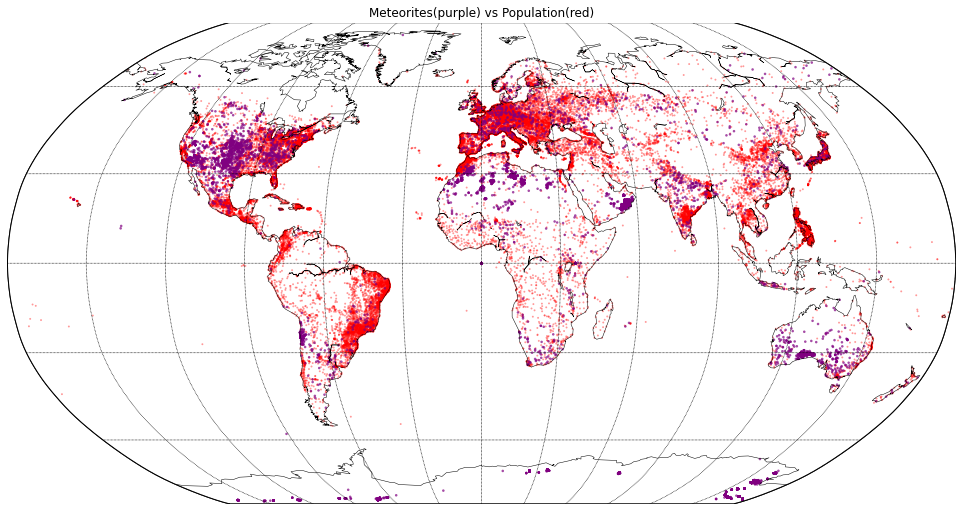

In [489]:
figure = plt.figure(figsize=(17,12))

m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawmapboundary(fill_color="w")
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(range(0, 360, 30),linewidth=0.7)
m.drawparallels([-60,-30,0.0,30,60],linewidth=0.7)
lon,lat = m(pop["Long"],pop["Lat"])
m.scatter(lon,lat,marker=".",s=15,color = 'r',alpha=0.40,edgecolor="None")
lon,lat = Map_Plot(df["Long"],df["Lat"])
Map_Plot.scatter(lon,lat,marker=".",s=26,color = 'purple',alpha=0.70,edgecolor="None")
plt.title("Meteorites(purple) vs Population(red)")

In [490]:
### Global Precipitation Map
precip = pd.read_csv('precipitation_clean.csv')
precip.columns = ["Long", "Lat", "Precipitation"]
precip = precip[precip["Precipitation"]!=-99999.99]

In [491]:
### Adding Precipitation to locations in Antarctica Map
df_antartica = df[df["Lat"]<-60]
df_antartica = df_antartica[["Long","Lat"]]
df_antartica['Precipitation'] = 5

#df_antartica.rename({"reclong": "Long", "reclat": "Lat"}, axis=1, inplace=True)
frames = [precip, df_antartica]
precip = pd.concat(frames)
precip


,Long,Lat,Precipitation
1500,-119.50000,85.50000,13.69
2262,-77.50000,83.50000,11.78
2263,-76.50000,83.50000,11.76
2264,-75.50000,83.50000,11.74
2265,-74.50000,83.50000,11.72
...,...,...,...
43683,35.66667,-71.50000,5.00
43764,35.24265,-72.09802,5.00
43983,35.40194,-71.54694,5.00
44210,35.66667,-71.50000,5.00


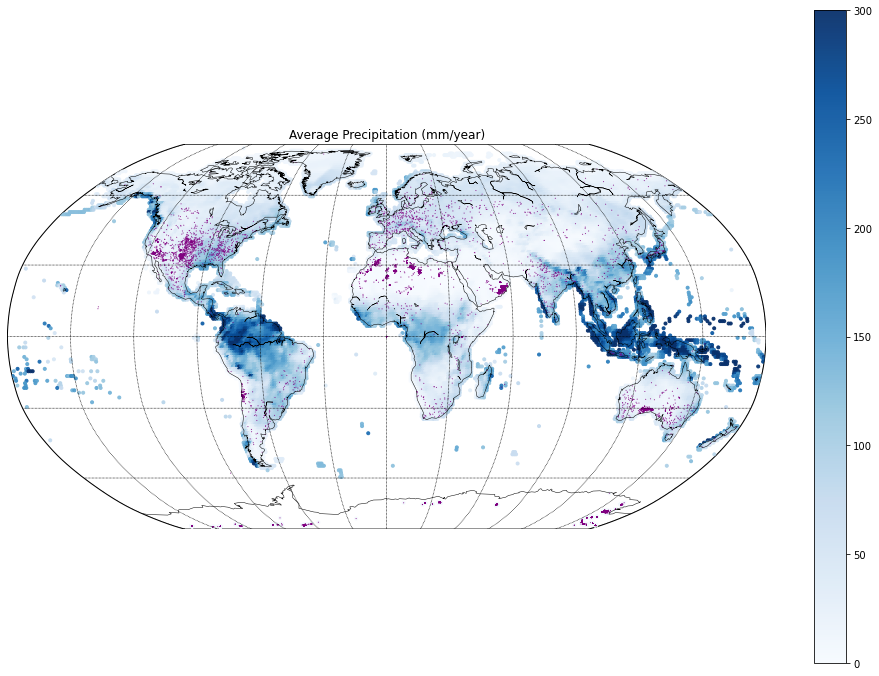

In [492]:
figure = plt.figure(figsize=(17,12))

Map_Plot = Basemap(projection='robin',lon_0=0,resolution='c')
Map_Plot.drawmapboundary(fill_color="w")
Map_Plot.drawcoastlines(linewidth=0.5)
Map_Plot.drawmeridians(range(0, 360, 30),linewidth=0.7)
Map_Plot.drawparallels([-60,-30,0.0,30,60],linewidth=0.7)
lon,lat = Map_Plot(precip["Long"],precip["Lat"])
color = precip["Precipitation"].to_numpy()

Map_Plot.scatter(lon,lat,marker=".",c=color,alpha=0.95,cmap='Blues')
plt.title("Average Precipitation (mm/year)")
plt.colorbar()
plt.clim(0,300)
lon,lat = Map_Plot(df["Long"],df["Lat"])
Map_Plot.scatter(lon,lat,marker=".",s=5,color = 'purple',alpha=0.80,edgecolor="None")

In [493]:
topo = genfromtxt('topography.csv', delimiter=',')
x=np.arange(361)
y=np.arange(181)
dff = pd.DataFrame(topo, columns=x, index=y)
dff = dff.stack().reset_index(name="values")
df_antartica.rename({"level_0": "Lat", "level_1": "Long", "values": "Topography"}, axis=1, inplace=True)
dff.columns = ["Lat", "Long", "Topography"]
dff["Lat"] = (dff["Lat"]-90)*-1
dff["Lat"] = dff["Lat"].astype(float)
dff["Long"] = dff["Long"].astype(float)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65341 entries, 0 to 65340
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lat         65341 non-null  float64
 1   Long        65341 non-null  float64
 2   Topography  65341 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


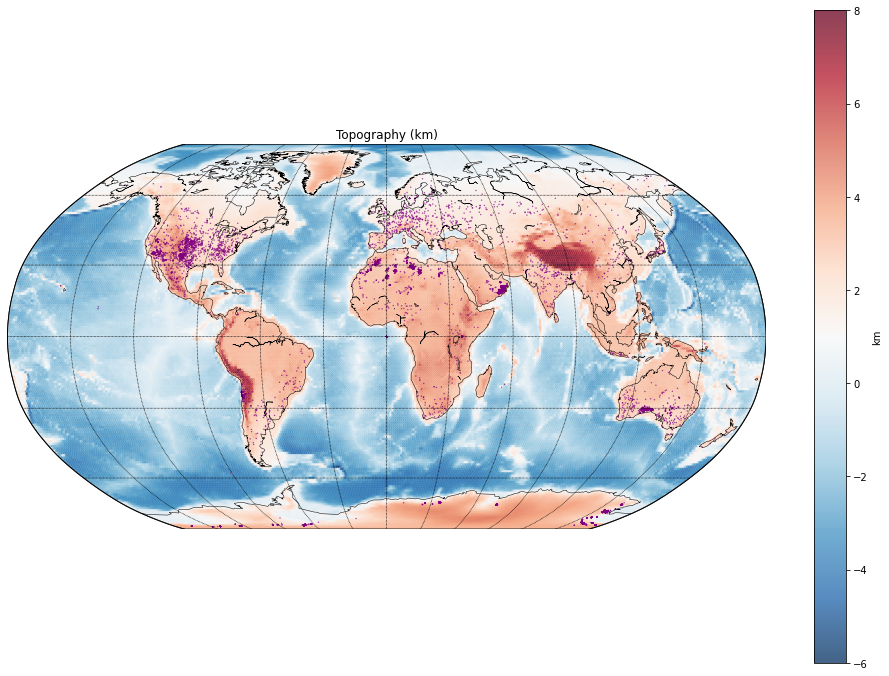

In [494]:
figure = plt.figure(figsize=(17,12))

m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawmapboundary(fill_color="w")
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(range(0, 360, 30),linewidth=0.7)
m.drawparallels([-60,-30,0.0,30,60],linewidth=0.7)
lon,lat = m(dff["Long"],dff["Lat"])
color = dff["Topography"].to_numpy()
orig_RdBu=plt.cm.get_cmap('RdBu')
reversed_RdBu = orig_RdBu.reversed()

m.scatter(lon,lat,marker=".",c = color,alpha=0.75,edgecolor="None",cmap=reversed_RdBu)
plt.title("Topography (km)")
colorbar = plt.colorbar()
plt.clim(-6,8)
colorbar.set_label('km', rotation=90)
#lon,lat = Map_Plot(df["reclong"],df["reclat"])
#color = dff["Topography"].to_numpy()
#Map_Plot.scatter(lon,lat,marker=".",color = color,alpha=0.50,edgecolor="None")
#plt.title("Meteorites(blue) vs Population(red)")
lon,lat = Map_Plot(df["Long"],df["Lat"])
Map_Plot.scatter(lon,lat,marker=".",s=8,color = 'purple',alpha=0.70,edgecolor="None")

In [495]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat))
gdff = gpd.GeoDataFrame(dff, geometry=gpd.points_from_xy(dff.Long, dff.Lat))
topo = gdff[['geometry','Topography']].copy()
gprecip = gpd.GeoDataFrame(precip, geometry=gpd.points_from_xy(precip.Long, precip.Lat))
gprecip = gprecip[['geometry','Precipitation']].copy()

def ckdnearest(gdA, gdB):

    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y))))
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nB)
    dist, idx = btree.query(nA, k=1)
    gdB_nearest = gdB.iloc[idx].drop(columns="geometry").reset_index(drop=True)
    gdf = pd.concat(
        [
            gdA.reset_index(drop=True),
            gdB_nearest,
            pd.Series(dist, name='dist')
        ], 
        axis=1)

    return gdf

gdf_new = ckdnearest(gdf, topo)
del gdf_new["dist"]
gdf_new

,name,id,nametype,recclass,mass,fall,year,Lat,Long,GeoLocation,num_class,geometry,Topography
0,Aachen,1,Valid,LOC,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",4,POINT (6.08333 50.77500),1.71570
1,Aarhus,2,Valid,HOC,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",1,POINT (10.23333 56.18333),1.42950
2,Abee,6,Valid,OC,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)",5,POINT (-113.00000 54.21667),1.51580
3,Acapulco,10,Valid,PA,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)",6,POINT (-99.90000 16.88333),3.40710
4,Achiras,370,Valid,LOC,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)",4,POINT (-64.95000 -33.16667),-0.83829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,Zillah 002,31356,Valid,PA,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)",6,POINT (17.01850 29.03700),2.97980
38109,Zinder,30409,Valid,SIM,46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)",7,POINT (8.96667 13.78333),3.63810
38110,Zlin,30410,Valid,HOC,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)",1,POINT (17.66667 49.25000),2.13010
38111,Zubkovsky,31357,Valid,LOC,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)",4,POINT (41.50460 49.78917),1.79590


In [496]:
gdf_new2 = ckdnearest(gdf_new, gprecip)
del gdf_new2["dist"]
gdf_new2

,name,id,nametype,recclass,mass,fall,year,Lat,Long,GeoLocation,num_class,geometry,Topography,Precipitation
0,Aachen,1,Valid,LOC,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",4,POINT (6.08333 50.77500),1.71570,68.94
1,Aarhus,2,Valid,HOC,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",1,POINT (10.23333 56.18333),1.42950,52.16
2,Abee,6,Valid,OC,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)",5,POINT (-113.00000 54.21667),1.51580,27.23
3,Acapulco,10,Valid,PA,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)",6,POINT (-99.90000 16.88333),3.40710,135.26
4,Achiras,370,Valid,LOC,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)",4,POINT (-64.95000 -33.16667),-0.83829,70.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,Zillah 002,31356,Valid,PA,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)",6,POINT (17.01850 29.03700),2.97980,4.45
38109,Zinder,30409,Valid,SIM,46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)",7,POINT (8.96667 13.78333),3.63810,32.28
38110,Zlin,30410,Valid,HOC,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)",1,POINT (17.66667 49.25000),2.13010,52.86
38111,Zubkovsky,31357,Valid,LOC,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)",4,POINT (41.50460 49.78917),1.79590,48.03


In [497]:
gpd_pop = gpd.GeoDataFrame(pop, geometry=gpd.points_from_xy(pop.Long, pop.Lat)).set_crs('EPSG:4326').to_crs('EPSG:3857')
gpd_pop = gpd_pop[['geometry','population']].copy()

gdf_new2_m = gdf_new2.copy()
del gdf_new2_m["geometry"]
gdf_new2_mm = gpd.GeoDataFrame(gdf_new2_m, geometry=gpd.points_from_xy(gdf_new2_m.Long, gdf_new2_m.Lat)).set_crs('EPSG:4326').to_crs('EPSG:3857')

gdf_complete = ckdnearest(gdf_new2_mm, gpd_pop)
del gdf_complete["GeoLocation"]
gdf_complete

,name,id,nametype,recclass,mass,fall,year,Lat,Long,num_class,Topography,Precipitation,geometry,population,dist
0,Aachen,1,Valid,LOC,21.0,Fell,1880.0,50.77500,6.08333,4,1.71570,68.94,POINT (677193.198 6581589.919),248960.0,217.628784
1,Aarhus,2,Valid,HOC,720.0,Fell,1951.0,56.18333,10.23333,1,1.42950,52.16,POINT (1139169.085 7594998.375),237551.0,5800.392836
2,Abee,6,Valid,OC,107000.0,Fell,1952.0,54.21667,-113.00000,5,1.51580,27.23,POINT (-12579102.460 7211298.260),5101.0,95534.501112
3,Acapulco,10,Valid,PA,1914.0,Fell,1976.0,16.88333,-99.90000,6,3.40710,135.26,POINT (-11120817.130 1907248.183),673478.0,3010.439194
4,Achiras,370,Valid,LOC,780.0,Fell,1902.0,-33.16667,-64.95000,4,-0.83829,70.73,POINT (-7230200.927 -3917447.572),158298.0,67287.555768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,Zillah 002,31356,Valid,PA,172.0,Found,1990.0,29.03700,17.01850,6,2.97980,4.45,POINT (1894490.754 3380356.149),10.0,88175.943135
38109,Zinder,30409,Valid,SIM,46.0,Found,1999.0,13.78333,8.96667,7,3.63810,32.28,POINT (998165.139 1549370.218),235605.0,2660.489367
38110,Zlin,30410,Valid,HOC,3.3,Found,1939.0,49.25000,17.66667,1,2.13010,52.86,POINT (1966644.708 6317388.118),74478.0,2881.690750
38111,Zubkovsky,31357,Valid,LOC,2167.0,Found,2003.0,49.78917,41.50460,4,1.79590,48.03,POINT (4620270.938 6409843.541),11270.0,109141.371354


In [498]:
print("CLASS\n")
print(gdf_complete["recclass"].value_counts())

CLASS

HOC     15874
LOC     12895
LLOC     4821
PA       1477
CC       1265
IM       1073
OC        494
SIM       214
Name: recclass, dtype: int64


/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


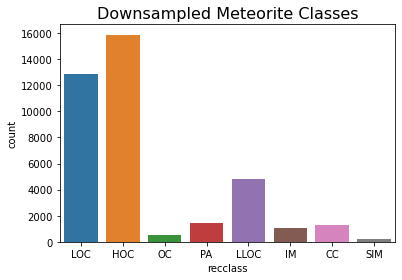

In [499]:
sns.countplot('recclass', data=gdf_complete)
plt.title('Downsampled Meteorite Classes', fontsize=16)
plt.show()

In [500]:
gdf_complete["found_fall"] = label_encoder.fit_transform(gdf_complete["fall"])
#gdf_complete.head()

/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


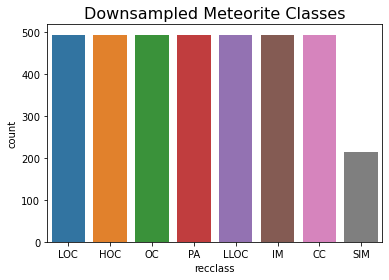

In [501]:
data = gdf_complete.sample(frac=1)

#Downsample Non-fraud data to the size of fraud counts(492)
SIM = data.loc[data['recclass'] == "SIM"]
CC = data.loc[data['recclass'] == "CC"][:len(OC)]
IM = data.loc[data['recclass'] == "IM"][:len(OC)]
OC = data.loc[data['recclass'] == "OC"]
PA = data.loc[data['recclass'] == "PA"][:len(OC)]
LOC = data.loc[data['recclass'] == "LOC"][:len(OC)]
LLOC = data.loc[data['recclass'] == "LLOC"][:len(OC)]
HOC= data.loc[data['recclass'] == "HOC"][:len(OC)]

gdf_complete2 = pd.concat([LOC,HOC,OC,PA,LLOC,IM,CC,SIM])
sns.countplot('recclass', data=gdf_complete2)
plt.title('Downsampled Meteorite Classes', fontsize=16)
plt.show()

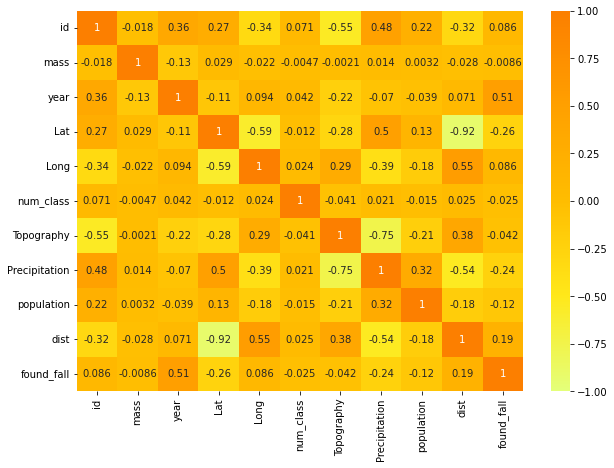

In [502]:
plt.figure(figsize = (10,7))
corr = gdf_complete.corr()
sb.heatmap(corr, cmap = 'Wistia', vmin=-1, vmax=1,annot= True)
plt.show(sb)

In [516]:

from sklearn.model_selection import train_test_split

############ Split to Test and Train ###############

X_final = gdf_complete2[['Lat', 'Long','Topography','Precipitation', 'population','dist']].copy()

#define y as being the "charges column" from the original dataset
y_final = gdf_complete2[['num_class']].copy()

#Test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )


In [517]:

#################### Feature Scaling ########################
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(float))
X_test= s_scaler.transform(X_test.astype(float))


In [518]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from statistics import mean
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "Perceptron": Perceptron()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", 
          round(training_score.mean(), 2) * 100, "% accuracy score")

/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

Classifiers:  LogisticRegression Has a training score of 31.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 36.0 % accuracy score


/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was ex

Classifiers:  SVC Has a training score of 33.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 37.0 % accuracy score


/var/folders/7l/_d7_56ts4p92bz2zmh89wzyw0000gn/T/ipykernel_26955/1769407422.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarn

Classifiers:  RandomForestClassifier Has a training score of 39.0 % accuracy score
Classifiers:  Perceptron Has a training score of 17.0 % accuracy score


/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

In [519]:
#fit model
forest = RandomForestClassifier()
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

forest train score 0.675, forest test score: 0.381


In [521]:
importance = pd.DataFrame({"Importance":forest.feature_importances_, "name": ['Lat', 'Long','Topography','Precipitation', 'population','dist']}).sort_values("Importance", ascending=False)
importance

,Importance,name
3,0.549806,dist
0,0.174177,Topography
2,0.141167,population
1,0.134850,Precipitation


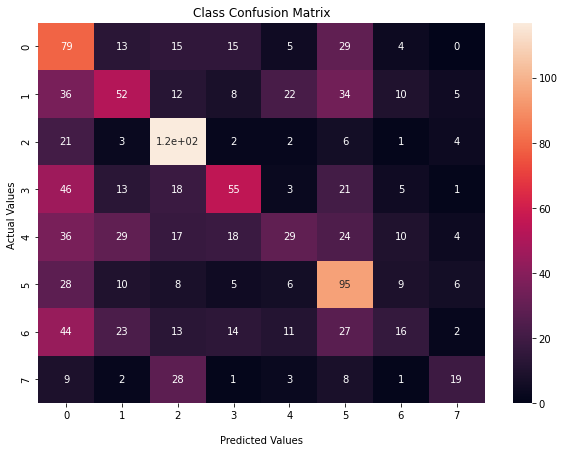

In [522]:
from sklearn.metrics import confusion_matrix 
plt.figure(figsize = (10,7))
cf_matrix = confusion_matrix(y_test,y_test_pred)

a = sns.heatmap(cf_matrix, annot=True)
a.set_title('Class Confusion Matrix');
a.set_xlabel('\nPredicted Values')
a.set_ylabel('Actual Values ');
plt.show()

In [523]:
print("CLASS\n")
print(gdf_complete["recclass"].value_counts())

CLASS

HOC     15874
LOC     12895
LLOC     4821
PA       1477
CC       1265
IM       1073
OC        494
SIM       214
Name: recclass, dtype: int64


In [524]:
print("CLASS\n")
print(gdf_complete["num_class"].value_counts())

CLASS

1    15874
4    12895
3     4821
6     1477
0     1265
2     1073
5      494
7      214
Name: num_class, dtype: int64


In [510]:
#Best Models
#CC, HOC, IM, LLOC, LOC

# Ordger of Classes
#CC, HOC, IM, LLOC, LOC, OC, PA, SIM